In [317]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["legend.fontsize"] = 16
#plt.rcParams["text.fontsize"] = 16
try :
    import os
    os.mkdir('images')
except:
    pass

import elec_kine as ek

In [130]:
def thetatoeta(theta):
    return -np.log(np.tan(theta/2))

In [306]:
#minimum distance to the beampipe
clearance=0.5

#gap between left and right halves
LRgap=0.4

#detector size
det_height=30
#not counting LRgap
det_width=40

#old version
# outer_radius=17
# horizontal_extension=11

#new version... calculate based on the shadow of the ECal
ECAL_clearance=3.45
flange_radius=(4.3707*2.54)/2
flange_width=(5.9919)*2.54


print("ECAL radius=",ECAL_clearance+flange_radius)

ECAL_horizontal_extension=(flange_width-2*flange_radius)

Moliere_radius=2.1
outer_radius = (flange_radius+ECAL_clearance)*320/194+Moliere_radius  #one moliere radius from the edge of the shadow of the ECAL endcap
horizontal_extension=ECAL_horizontal_extension*320/194
print(f"outer radius is {outer_radius:.2f}")
print(f"horizontal_extension is {horizontal_extension:.2f}")

#position="pre-flange"
position="HCAL+10cm"

if position == "pre-flange":
    #radii and positions of holes
    R1=4.281
    X1=0
    R2=1.574
    X2=6.825
    z_downstream=-269.72 # downstream face, at flange
elif position == "pre-HCAL":
    #radii and positions of holes
    #R1=4.4922
    #X1=0
    #R2=2.223
    #X2=8.2406
    z_downstream=-329.6 # downstream face, in front of the HCal
    X1=0
    R1=4.281+(4.21-4.281)*(z_downstream-(-269.72))/14.21
    R2=1.574+(1.519-1.574)*(z_downstream-(-269.72))/14.21
    X2=6.825+(6.407-6.825)*(z_downstream-(-269.72))/14.21
    print(f"R1={R1:.3f}\nR2={R2:.3f}\nX1={X1:.3f}\nX2={X2:.3f}")
elif position == "HCAL+10cm":
    #radii and positions of holes
    #R1=4.4922
    #X1=0
    #R2=2.223
    #X2=8.2406
    z_downstream=-329.6+10 # downstream face, with 10 cm space in front of the HCa
    X1=0
    R1=4.281+(4.21-4.281)*(z_downstream-(-269.72))/14.21
    R2=1.574+(1.519-1.574)*(z_downstream-(-269.72))/14.21
    X2=6.825+(6.407-6.825)*(z_downstream-(-269.72))/14.21
    print(f"R1={R1:.3f}\nR2={R2:.3f}\nX1={X1:.3f}\nX2={X2:.3f}")

ECAL radius= 9.000789000000001
outer radius is 16.95
horizontal_extension is 6.79
R1=4.530
R2=1.767
X1=0.000
X2=8.292


In [307]:
class Component():
    def __init__(self,z_offset, thickness, name):
        self.z_offset=z_offset
        self.thickness=thickness
        self.name=name
z=0
components={}

#for name, thickness in [("absorber", 0.35), ("scint", 0.3), ("foil2", 0.015), ("pcb", 0.08),
#                         ("insulator", 0.007),
#                         ("airgap2", 0.0365)]:
#simpler version
for name, thickness in [("absorber", 0.35), ("scint", 0.2), ("pcb", 0.08)]:
    components[name]=Component(z, thickness, name)
    z+=thickness
coord_length=z
abs_1_layer=components['absorber'].thickness

nlayer_pairs=11
z_upstream=z_downstream+nlayer_pairs*2*coord_length+abs_1_layer

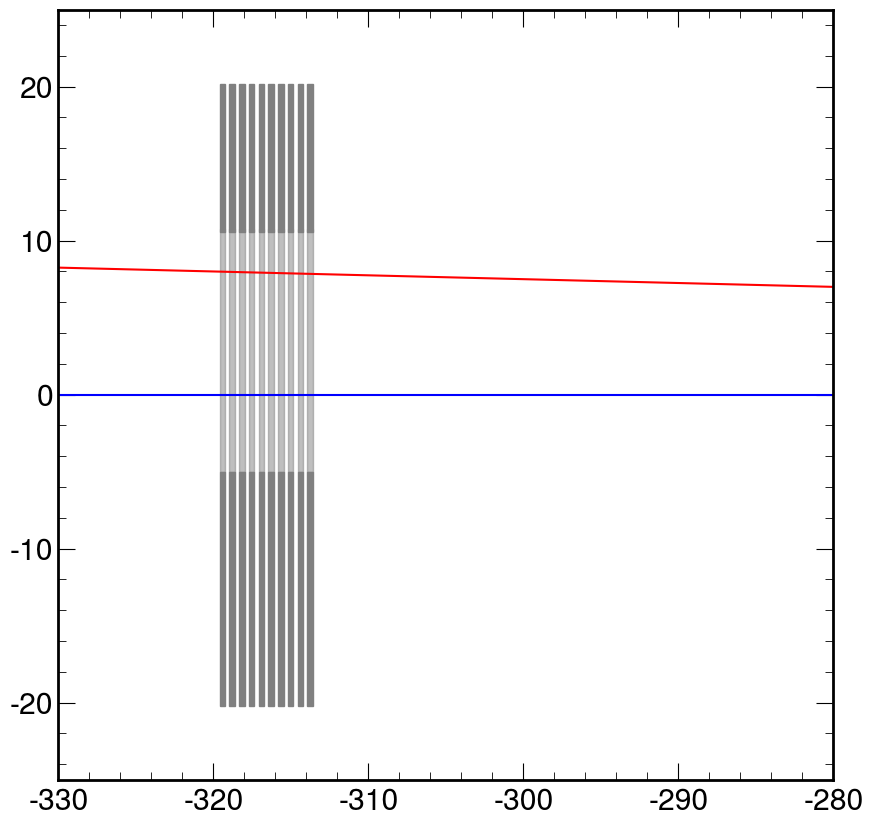

In [308]:
plt.subplots(1,1, figsize=(10,10))
npairs=10
z=z_downstream

half_width=det_width/2
for i in range(npairs):
    plt.gca().add_patch(mpl.patches.Rectangle((z, -LRgap/2-half_width), components['absorber'].thickness,
                                              (half_width+LRgap/2-R1-clearance),
                 color='0.5'))#tungsten
    
    plt.gca().add_patch(mpl.patches.Rectangle((z, R2+X2+clearance), components['absorber'].thickness, 
                                              (half_width+LRgap/2-(R2+X2+clearance)),
                 color='0.5'))#tungsten
    plt.gca().add_patch(mpl.patches.Rectangle((z, -R1-clearance), components['absorber'].thickness, 
                                              (LRgap/2+R1+R2+X2+2*clearance),
                 color='0.5', alpha=0.5))#tungsten
    z+=coord_length
plt.xlim(-330, -280)
plt.ylim(-25, 25)
plt.axhline(0, color='b')
x=np.array(plt.gca().get_xlim())
plt.plot(x,-0.025*x, color='r')
plt.show()

ECal radius 7.350789
ECal offset R 5.817848


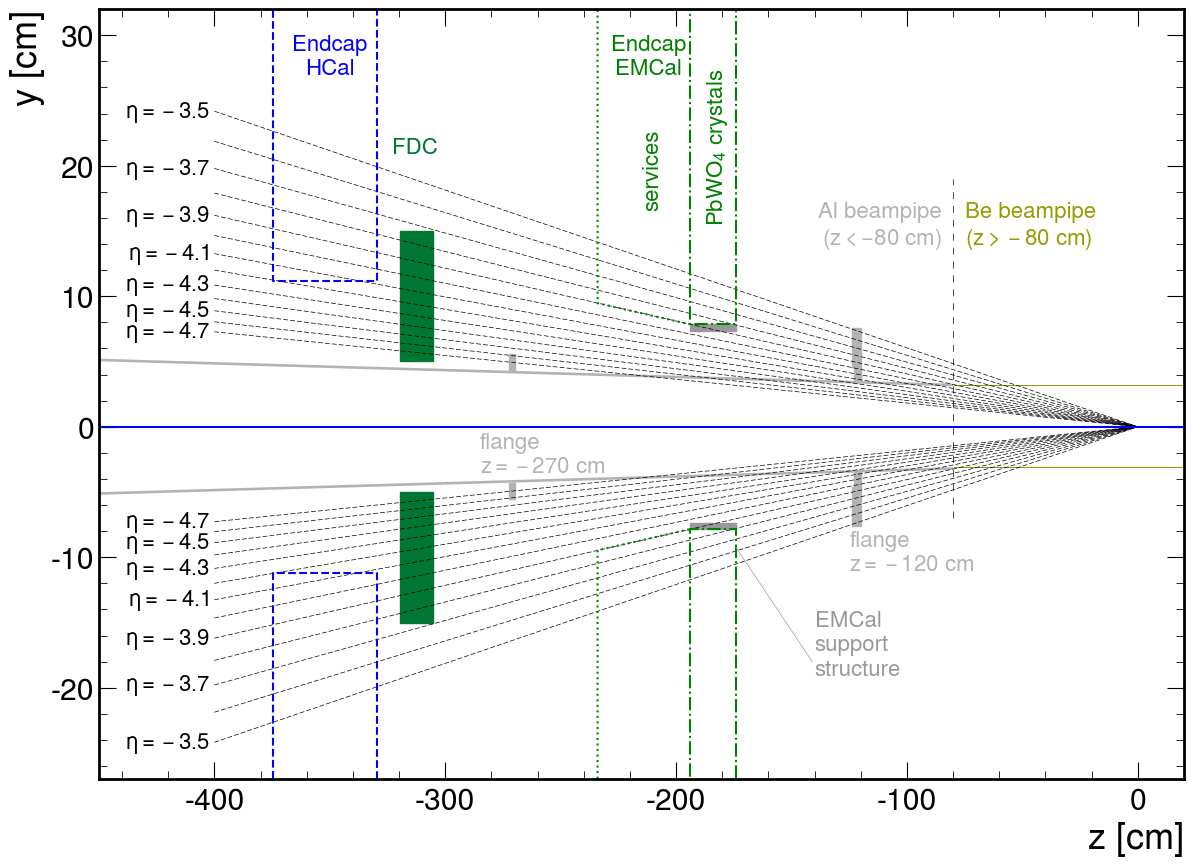

ECal radius 7.350789
ECal offset R 5.817848


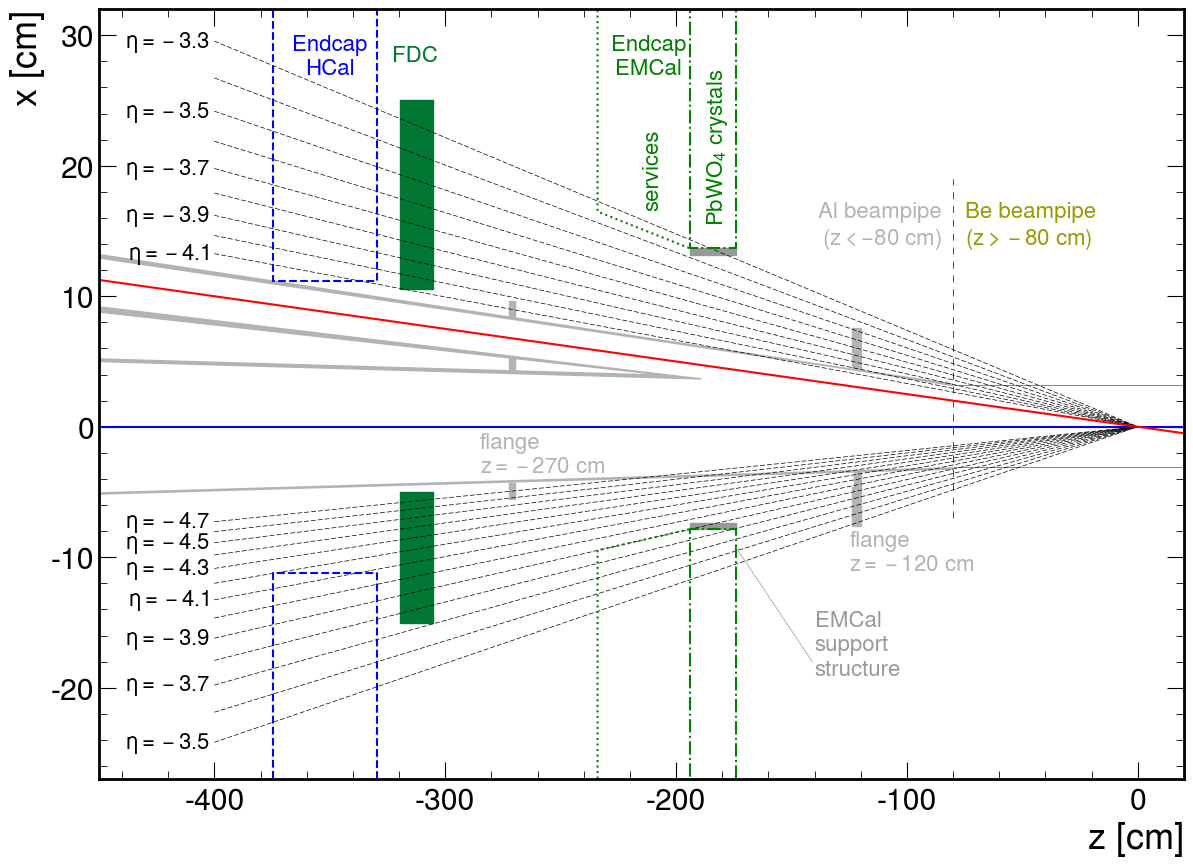

In [314]:
for slc in 'yz','xz':
    plt.subplots(1,1,figsize=(14,10))
    #FDC
    FDC='#007733'
    plt.gca().add_patch(mpl.patches.Rectangle((z_downstream,-det_height/2), z_upstream-z_downstream, det_height/2-R1-clearance,
                                             color=FDC))
    if slc=='yz':
        plt.gca().add_patch(mpl.patches.Rectangle((z_downstream,R1+clearance), z_upstream-z_downstream, det_height/2-R1-clearance,
                                             color=FDC))
    else :
        plt.gca().add_patch(mpl.patches.Rectangle((z_downstream,X2+R2+clearance), z_upstream-z_downstream, det_width-det_height/2-(X2+R2+clearance),
                                             color=FDC))

    plt.text(-323, 21 if slc == 'yz' else 28, "FDC", color=FDC, fontsize=16)

    #eta lines
    for i,eta in enumerate(np.linspace(-4.7, -3.3, 15)):
        for s in 1,-1:
            if s == 1 and slc == 'xz' and eta<-4.1 \
                or (slc == 'yz' or s==-1) and eta>-3.5:
                continue
            #z=-330
            z=-400
            yi=s*z*np.tan(ek.etatotheta(eta))
            plt.plot((z, 0),(yi,0), color='k', lw=0.5, ls=(0,(7,3)))
            if i %2 ==0:
                plt.text(z-2, yi, f"$\\eta={eta:.1f}$", ha='right', va='center', fontsize=16)


    Al='0.7'
    #microflange
    if slc=='yz':
        #plt.gca().add_patch(mpl.patches.Rectangle([-269.72-2.54, 8.2346/2], 2.54, 11.106/2-8.2346/2, color=Al))
        #plt.gca().add_patch(mpl.patches.Rectangle([-269.72-2.54, -11.106/2], 2.54, 11.106/2-8.2346/2, color=Al))
        plt.gca().add_patch(mpl.patches.Rectangle([-269.72-2.54, (3.3707)*2.54/2], 2.54, (4.3707-3.3707)*2.54/2, color=Al))
        plt.gca().add_patch(mpl.patches.Rectangle([-269.72-2.54, -4.3707*2.54/2], 2.54, (4.3707-3.3707)*2.54/2, color=Al))
    else :
        #plt.gca().add_patch(mpl.patches.Rectangle([-269.72-2.54, 8.4], 2.54, 9.67-8.4, color=Al))
        plt.gca().add_patch(mpl.patches.Rectangle([-269.72-2.54, 2.6888*2.54+1.2393*2.54/2], 2.54, 1.1178*2.54-1.2393*2.54/2, color=Al))
        #plt.gca().add_patch(mpl.patches.Rectangle([-269.72-2.54, -11.106/2], 2.54, 11.106/2-8.2346/2, color=Al))
        plt.gca().add_patch(mpl.patches.Rectangle([-269.72-2.54, -4.3707*2.54/2], 2.54, (4.3707-3.3707)*2.54/2, color=Al))
        plt.gca().add_patch(mpl.patches.Rectangle([-269.72-2.54, 3.3707*2.54/2], 2.54, 2.6888*2.54-1.2393*2.54/2-3.3707*2.54/2, color=Al))
    
    #-120 cm flange

    if slc=='yz':
        plt.gca().add_patch(mpl.patches.Rectangle([-123.96, 4.60], 3.96, 7.58-4.60,color=Al))
        plt.gca().add_patch(mpl.patches.Rectangle([-123.96, -7.58], 3.96, 7.58-4.60,color=Al))
        plt.gca().add_patch(mpl.patches.Rectangle([-123.96+1.2, 4.60-1.1], 3.96-1.2, 1.1,color=Al))
        plt.gca().add_patch(mpl.patches.Rectangle([-123.96+1.2, -4.60], 3.96-1.2, 1.1,color=Al))
    else:
        plt.gca().add_patch(mpl.patches.Rectangle([-123.96, 4.60], 3.96, 7.58-4.60,color=Al))
        plt.gca().add_patch(mpl.patches.Rectangle([-123.96, -7.58], 3.96, 7.58-4.60,color=Al))
        plt.gca().add_patch(mpl.patches.Rectangle([-123.96+1.2, 4.60-0.14], 3.96-1.2, 0.14,color=Al))
        plt.gca().add_patch(mpl.patches.Rectangle([-123.96+1.2, -4.60], 3.96-1.2, 1.1,color=Al))

    Be='#999900'
    for s in -1,1:
        #plt.plot((0,-98,-145, -207, -327, -362), 
             #s*np.array(((2.389+3.583)/2,(2.448+3.524)/2, (2.875+3.894)/2, (4.255+2.912)/2, (3.382+4.580)/2,(3.802+4.559)/2)))
        plt.gca().add_patch(mpl.patches.Polygon(list(zip((20,-79.5, -79.5, 20,20),
             s*np.array((3.1762,3.1762, 3.1, 3.1, 3.1762)))), color=Be,lw=0))
        #plt.gca().add_patch(mpl.patches.Polygon(list(zip((-80,-120, -270, -270, -120, -80,-80),
        #     s*np.array((3.3,3.5, 4.28,4.08, 3.3, 3.1,3.3)))), color=Al, lw=0))

    #implement the 9 o'clock side
    #extended
    zext=-450
    plt.gca().add_patch(mpl.patches.Polygon(list(zip((-80,-120, zext, zext, -120, -80,-80),
        -np.array((3.3,3.5, 3.5+(4.28-3.5)*(zext-(-120))/(-270-(-120)),
                         3.5+(4.28-3.5)*(zext-(-120))/(-270-(-120))-.2, 3.3, 3.1,3.3)))), color=Al, lw=0))
    if slc== 'xz':
        # 3 oclock side
        plt.gca().add_patch(mpl.patches.Polygon(list(zip((-80,-120, zext, zext, -120, -80,-80),
            np.array((3.33,4.36, 4.36+(8.4-4.36)*(zext-(-120))/(-270-(-120)),
                             4.36+(8.23-4.36)*(zext-(-120))/(-270-(-120)), 4.22, 3.1,3.3)))), color=Al, lw=0))
        plt.gca().add_patch(mpl.patches.Polygon(list(zip((-205,-271,zext, zext,-271,-189,-271,zext, zext), 
                                                          (3.947,5.251,
                                                           5.251+(5.251-3.947)*(zext+271)/(-271+205),
                                                           5.399+(5.399-3.661)*(zext+271)/(-271+189),
                                                           5.399, 3.661,4.08, 4.08+(zext+271)*(4.08-3.66)/(-271+189),
                                                          4.28+(zext+271)*(4.08-3.66)/(-271+189)))), color=Al, lw=1))
    else :
        plt.gca().add_patch(mpl.patches.Polygon(list(zip((-80,-120, zext, zext, -120, -80,-80),
            np.array((3.3,3.5, 3.5+(4.28-3.5)*(zext-(-120))/(-270-(-120)),
                         3.5+(4.28-3.5)*(zext-(-120))/(-270-(-120))-.2, 3.3, 3.1,3.3)))), color=Al, lw=0))

    #indicate where the different beampipe materials are located
    plt.text(-75, 14, "Be beampipe\n($z>-80$ cm)", color=Be, fontsize=16)
    plt.text(-85, 14, "Al beampipe\n($z<-80$ cm)", color=Al, fontsize=16, ha='right')
    plt.plot((-80,-80), (-7, 19), color='k', ls=(0,(10,10)), lw=0.5)


    plt.text(-125,-11, "flange\n$z=-120$ cm", fontsize=16, color=Al)
    plt.text(-285,-3.5, "flange\n$z=-270$ cm", fontsize=16, color=Al)

    plt.axhline(0, color='b')
    if slc == 'xz':
        plt.axline((0,0), slope=-.025, color='r')

    #ECal Endcap (determine from flange size and clearance)
    ECAL_clearance_TB=2.3
    ECAL_clearance_L=2.2
    ECAL_clearance_R=4.1
    ECAL_support_width=0.5

    flange_radius=(4.3707*2.54)/2
    flange_width=(5.9919)*2.54
    ECAL_width=flange_width+ECAL_clearance_R+ECAL_clearance_L-2*ECAL_support_width
    
    ECAL_radius=flange_radius+ECAL_clearance_TB-ECAL_support_width
    print("ECal radius", ECAL_radius)
    ECAL_offset_R=ECAL_width-2*ECAL_radius
    print("ECal offset R", ECAL_offset_R)
    for s in -1,1:
        dx=(slc=='xz')*ECAL_offset_R*(s==1)
        plt.plot((-234,-234, -194),(s*63, (s*(ECAL_radius+ECAL_support_width)+dx)*234/194, (s*(ECAL_radius+ECAL_support_width)+dx)), color='g', ls=':')
        plt.plot((-174,-174, -194,-194),(s*63, (s*(ECAL_radius+ECAL_support_width)+dx), (s*(ECAL_radius+ECAL_support_width)+dx), s*63), color='g', ls='-.')
    dx=(slc=='xz')*ECAL_offset_R
    plt.gca().add_patch(mpl.patches.Rectangle((-194,ECAL_radius+dx), 20, 0.5, color='0.6'))
    plt.gca().add_patch(mpl.patches.Rectangle((-194,-(ECAL_radius+ECAL_support_width)), 20, 0.5, color='0.6'))
    
    plt.text(-140, -19, "EMCal\nsupport\nstructure", fontsize=16, color='0.6')
    plt.plot((-141,-174),(-18, -9.25), color='0.6', lw=0.5)
    
    plt.text(-212, 27, "Endcap\nEMCal", fontsize=16, color='g', ha='center')
    plt.text(-182, 16, "PbWO$_4$ crystals", fontsize=16, color='g', ha='center', rotation=90)
    plt.text(-210, 17, "services", fontsize=16, color='g', ha='center', rotation=90)
    

    #HCal endcap
    for s in -1,1:
        plt.plot((-374.6,-374.6, -329.6,-329.6),(s*267, s*11.2, s*11.2, s*267), color='b', ls='--')
    plt.text(-350, 27, "Endcap\nHCal", fontsize=16, color='b', ha='center')
    
    
    plt.xlim(zext,20)
    plt.ylim(-27, 32)
    


    plt.xlabel("z [cm]")
    plt.ylabel(f"{slc[0]} [cm]")
    plt.savefig(f"images/materials_before_FDC_{slc}.pdf")
    plt.show()

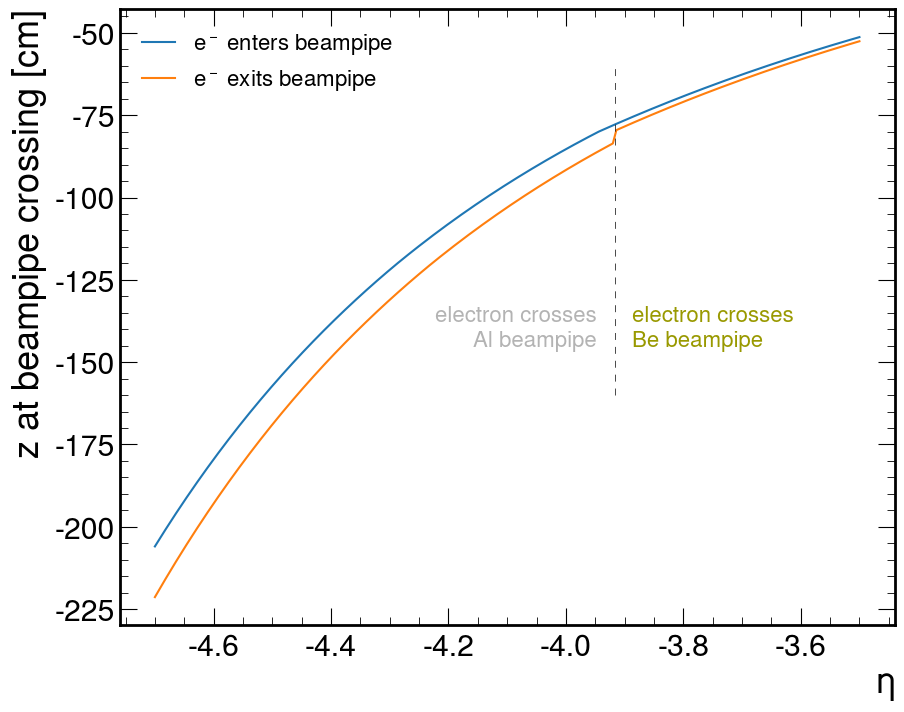

In [303]:
zext=-390
z=np.array((0,-80,-80.01,-120, zext))
#inner radii
r=np.array((3.1,3.1,3.1,3.3, 3.5+(4.28-3.5)*(zext-(-120))/(-270-(-120))-.2))
thickness=np.array([0.0762]*2+[.2]*3)


for isOuter in 0,1:
    etas=[]
    zs=[]
    for eta in np.linspace(-4.7, -3.5, 201):
        m=-np.abs(np.tan(ek.etatotheta(eta)))
        for i in range(len(z)-1):
            z1=z[i]
            z2=z[i+1]
            r1=r[i]+isOuter*thickness[i]
            r2=r[i+1]+isOuter*thickness[i+1]

            #r==abs(tan(theta))*z
            #(r-r2)*(z1-z2)/(r1-r2)==(z-z2)

            zint=(r2*z1 - r1*z2)/(-r1 + r2 + m*z1 - m*z2)
            if zint<z1 and zint>z2:
                break
        etas.append(eta)
        zs.append(zint)
    zs=np.array(zs)
    etas=np.array(etas)      

    plt.plot(etas,zs, label = ['$e^-$ enters beampipe', '$e^-$ exits beampipe'][isOuter])

#last aluminum
e1=etas[zs<-80][-1]
#first Be
e2=etas[zs>-80][0]
eta=(e1+e2)/2

plt.text(eta+.03, -145, "electron crosses\nBe beampipe", color=Be, fontsize=16)
plt.text(eta-.03, -145, "electron crosses\nAl beampipe", color=Al, ha='right', fontsize=16)
plt.plot((eta,eta), (-160, -60), color='k', ls=(0,(10,10)), lw=0.5)

plt.legend(fontsize=16)

#first flange
#r=np.array((4.60-1.1, 7.58))
#z=-120
#plt.plot(thetatoeta(np.pi-np.arctan(-r/z)), [z,z])


plt.xlabel("$\\eta$")
plt.ylabel("$z$ at beampipe crossing [cm]")

plt.savefig("images/crossing_material.pdf")
        

In [266]:
help(ek)

Help on module elec_kine:

NAME
    elec_kine

FUNCTIONS
    EptoQ2(E, Ep, theta)
    
    Eptoy(E, Ep, theta)
    
    Q2toEp(Q2, E, theta)
    
    Q2toy(Q2, E, theta)
    
    etatotheta(eta)
        #Return theta in rad
    
    etatothetadeg(eta)
        #Return theta in deg
    
    ytoEp(y, E, theta)
    
    ytoQ2(y, E, theta)

FILE
    /Users/spaul/EIC/backwards_insert/elec_kine.py


